# Introduction

The purpose of this notebook is as follows:
* __Clean/Pre-process__ the _Johns Hopkins Coronavirus Resource Center_ dataset, which contains time-series data of the confirmed COVID-19 cases for each day from 22-01-2020 to 31-3-2022, to prepare it for further analysis (namely, time-series forecasting using polynomial regression)
* __Create two new datasets__ from the original final dataset, containing the first 700 days (data points) and 800 days of the pandemic each, and export them as .csv files
* __Plot all the different datasets__ for all countries and comment on the results


To this end, a new Anaconda environment was created and used to install all the necessary packages the were utilized in this assignment.

In [21]:
# Importing all necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Cleaning the Dataset

In this section, the goal is to process the the _Johns Hopkins Coronavirus Resource Center_ dataset, so that it is in an appropriate format for time-series forecasting.

We begin by loading and viewing the dataset.

In [22]:
# Loading the dataset that need cleaning
df_csv = pd.read_csv('../data/time_series_covid19_confirmed_global.csv')
df_csv

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22,3/28/22,3/29/22,3/30/22,3/31/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,177255,177321,177321,177321,177321,177520,177602,177658,177716,177747
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,273146,273164,273257,273318,273387,273432,273432,273529,273608,273677
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265573,265585,265599,265612,265621,265629,265641,265651,265662,265671
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,39234,39713,39713,39713,39713,39713,39713,39713,40024,40024
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99058,99058,99081,99102,99106,99115,99115,99138,99138,99169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,654954,654954,655468,655468,655468,655468,655750,655750,655750,655750
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11802,11802,11803,11803,11803,11803,11803,11803,11805,11806
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,316088,316190,316312,316422,316501,316550,316550,316550,316550,316850


We observe a 0-based numerical index, a Province/State column, a Country/Region column, a Latitude and a Longitude column, and a column for each day between the dates 22-01-2020 to 31-3-2022.

First, we check for any missing or negative numerical values in the dataset (which could indicate data entry errors), and handle them appropriately.


In [23]:
# Checking for missing numerical values in the dataframe
sum_missing_cases = df_csv.iloc[:, df_csv.columns.get_loc('1/22/20'):df_csv.columns.get_loc('3/31/22') + 1].isna().sum().sum()

# Handling missing values with forward and backward fill methods
if sum_missing_cases:
    df_csv.ffill(axis=1, inplace=True)  # Apply forward fill
    df_csv.bfill(axis=1, inplace=True)  # Apply backward fill for cases where the first value is NaN
else:
    print("Dataset has no missing values.")

# Checking negative values starting from the fifth column in the dataframe
has_negative_values = (df_csv.iloc[:, 4:] < 0).values.any()
if has_negative_values:
    print("Dataset contains negative values.")
else:
    print("No negative values in the dataset.")

Dataset has no missing values.
No negative values in the dataset.


As per the assignment's desiderata, we only need to keep the COVID-19 confirmed cases for the following countries:
* Korea, South
* Japan
* Italy
* Spain
* Germany
* Greece

We also need to keep all of the dates. This means that the Latitude and Longitude columns are redundant and can be removed.

In addition, we can see that certain countries appear multiple times (e.g. Australia), because there are data for specific provinces/states of those countries. We need to check if this is the case for any of our chosen countries and, if so, merge all their occurences into a single row, by adding the values of all their states for each day. This is done so we can also remove the Province/State column.

In [24]:
# Specifying the target countries
target_countries = ['Korea, South','Japan','Italy','Spain','Germany','Greece']

# Counting the occurences of the target countries
occurences = df_csv['Country/Region'].value_counts().loc[target_countries]
print(occurences)

Country/Region
Korea, South    1
Japan           1
Italy           1
Spain           1
Germany         1
Greece          1
Name: count, dtype: int64


Since the target countries only appear once in the dataset, we can safely remove all redundant columns and rows.

In [25]:
# Removing the redundant columns
df_csv_dropped = df_csv.drop(columns=['Province/State','Lat','Long'], axis=1)

# Filtering the dataframe to only keep the rows corresponding to the target countries
df_filtered = df_csv_dropped[df_csv_dropped['Country/Region'].isin(target_countries)]
df_filtered

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22,3/28/22,3/29/22,3/30/22,3/31/22
135,Germany,0,0,0,0,0,1,4,4,4,...,18994411,19278143,19596530,19893028,19893028,19893028,20323779,20561131,20829608,21104509
137,Greece,0,0,0,0,0,0,0,0,0,...,2838891,2861993,2884100,2900334,2916892,2930321,2957810,2986882,3009333,3030429
154,Italy,0,0,0,0,0,0,0,0,0,...,13992092,14070450,14153098,14229495,14304111,14364723,14396283,14496579,14567990,14642354
156,Japan,2,2,2,2,4,4,7,7,11,...,6156221,6197583,6247334,6294771,6342100,6385448,6415168,6459761,6513370,6565019
162,"Korea, South",1,1,2,2,3,4,4,4,4,...,10427247,10822836,11162232,11497711,11815841,12003054,12350428,12774956,13095631,13375818
241,Spain,0,0,0,0,0,0,0,0,0,...,11378784,11378784,11378784,11451676,11451676,11451676,11451676,11508309,11508309,11508309


The ideal index for our dataframe should be the dates, as they are the time component of this time-series dataset. __In time-series analysis, it is crucial to have the time dimension as the index, because it preserves the chronological (temporal) order of the observations.__ In addition, it simplifies plotting, it allows for time-based operations, as well as compatibility with forecasting tools.

To achieve this in our dataframe, we first set the country names as the index.

In [26]:
# Setting the country names as dataframe index
df_country_indexed = df_filtered.set_index(df_filtered.columns[0])
df_country_indexed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22,3/28/22,3/29/22,3/30/22,3/31/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Germany,0,0,0,0,0,1,4,4,4,5,...,18994411,19278143,19596530,19893028,19893028,19893028,20323779,20561131,20829608,21104509
Greece,0,0,0,0,0,0,0,0,0,0,...,2838891,2861993,2884100,2900334,2916892,2930321,2957810,2986882,3009333,3030429
Italy,0,0,0,0,0,0,0,0,0,2,...,13992092,14070450,14153098,14229495,14304111,14364723,14396283,14496579,14567990,14642354
Japan,2,2,2,2,4,4,7,7,11,15,...,6156221,6197583,6247334,6294771,6342100,6385448,6415168,6459761,6513370,6565019
"Korea, South",1,1,2,2,3,4,4,4,4,11,...,10427247,10822836,11162232,11497711,11815841,12003054,12350428,12774956,13095631,13375818
Spain,0,0,0,0,0,0,0,0,0,0,...,11378784,11378784,11378784,11451676,11451676,11451676,11451676,11508309,11508309,11508309


Then, we transpose the dataframe, so that the countries become columns and the dates become rows.

In [27]:
# Transposing the dataframe
df_transposed = df_country_indexed.transpose()
df_transposed

Country/Region,Germany,Greece,Italy,Japan,"Korea, South",Spain
1/22/20,0,0,0,2,1,0
1/23/20,0,0,0,2,1,0
1/24/20,0,0,0,2,2,0
1/25/20,0,0,0,2,2,0
1/26/20,0,0,0,4,3,0
...,...,...,...,...,...,...
3/27/22,19893028,2930321,14364723,6385448,12003054,11451676
3/28/22,20323779,2957810,14396283,6415168,12350428,11451676
3/29/22,20561131,2986882,14496579,6459761,12774956,11508309
3/30/22,20829608,3009333,14567990,6513370,13095631,11508309


Finally, we convert the index to a DateTime format, making sure that the resulting indeces are of the form YYYY-MM-DD. In addition, we append a 'Day' column to the dataframe.

In time-series analysis, especially when using models like Ridge regression that do not inherently process time data, it is important to convert time information into a numerical format that these models can understand. Adding a 'Day' column transforms the date index into a numerical scale, representing the number of days since the start of the dataset. This approach allows the model to recognize the progression of time as a quantifiable feature, aligns the data of all countries on a consistent time scale, and facilitates the generation of polynomial features to capture complex temporal patterns.

In [29]:
# Converting the index to DateTime, ensuring a YYYY-MM-DD format
df_final = df_transposed.assign(index=pd.to_datetime(df_transposed.index,format='%m/%d/%y')).set_index('index', inplace=False).rename_axis(None)
df_final['Day'] = (df_final.index - df_final.index.min()).days + 1
df_final

Country/Region,Germany,Greece,Italy,Japan,"Korea, South",Spain,Day
2020-01-22,0,0,0,2,1,0,1
2020-01-23,0,0,0,2,1,0,2
2020-01-24,0,0,0,2,2,0,3
2020-01-25,0,0,0,2,2,0,4
2020-01-26,0,0,0,4,3,0,5
...,...,...,...,...,...,...,...
2022-03-27,19893028,2930321,14364723,6385448,12003054,11451676,796
2022-03-28,20323779,2957810,14396283,6415168,12350428,11451676,797
2022-03-29,20561131,2986882,14496579,6459761,12774956,11508309,798
2022-03-30,20829608,3009333,14567990,6513370,13095631,11508309,799


# Creating the New Datasets

We now have a final cleaned dataset ready for forecasting. In this section, the goal is to __create two new datasets__, containing the first 700 days (data points/rows in this case) and first 800 days of the pandemic respectively and export them as .csv files named 'final_data_700_days.csv' and 'final_data_800_days.csv' respecrtively to the 'data' directory.

Notably, based on the size of the final dataset, we can see that the first 800 days of the pandemic cover the entire final dataset, meaning that the 'final_data_800_days.csv' is identical to the 'df_final' dataframe.

In [30]:
# Creating a new dataset by export the first 700 rows
df_final.iloc[:700].to_csv('../data/final_data_700_days.csv', index=True)

# Creating a new dataset by export the first 800 rows
df_final.iloc[:800].to_csv('../data/final_data_800_days.csv', index=True)

# Plotting the Datasets

In this section, we will plot the complete ('df_final' dataframe), 700 points ('final_data_700_days.csv') and 800 points ('final_data_800_days.csv') datasets, for all countries after data cleaning, in __three separate figures.__

First, we load the two new datasets, making sure we have the correct index (because of the nature of `to_csv` with `index=True`).

In [31]:
# Loading the two new datasets with the date column index
df_700 = pd.read_csv('../data/final_data_700_days.csv', index_col=0)
df_700.index = pd.to_datetime(df_700.index)
df_700

,Germany,Greece,Italy,Japan,"Korea, South",Spain,Day
2020-01-22,0,0,0,2,1,0,1
2020-01-23,0,0,0,2,1,0,2
2020-01-24,0,0,0,2,2,0,3
2020-01-25,0,0,0,2,2,0,4
2020-01-26,0,0,0,4,3,0,5
...,...,...,...,...,...,...,...
2021-12-17,6721375,1026902,5336795,1729048,558864,5455527,696
2021-12-18,6721375,1031239,5364852,1729248,565098,5455527,697
2021-12-19,6721375,1034070,5389155,1729421,570414,5455527,698
2021-12-20,6809622,1037759,5405360,1729555,575615,5535231,699


In [32]:
df_800 = pd.read_csv('../data/final_data_800_days.csv', index_col=0)
df_800.index = pd.to_datetime(df_800.index)
df_800

,Germany,Greece,Italy,Japan,"Korea, South",Spain,Day
2020-01-22,0,0,0,2,1,0,1
2020-01-23,0,0,0,2,1,0,2
2020-01-24,0,0,0,2,2,0,3
2020-01-25,0,0,0,2,2,0,4
2020-01-26,0,0,0,4,3,0,5
...,...,...,...,...,...,...,...
2022-03-27,19893028,2930321,14364723,6385448,12003054,11451676,796
2022-03-28,20323779,2957810,14396283,6415168,12350428,11451676,797
2022-03-29,20561131,2986882,14496579,6459761,12774956,11508309,798
2022-03-30,20829608,3009333,14567990,6513370,13095631,11508309,799


We then proceed to plot the 700 days dataset.

/home/giatraskon/anaconda3/envs/MLiCB/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/giatraskon/anaconda3/envs/MLiCB/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


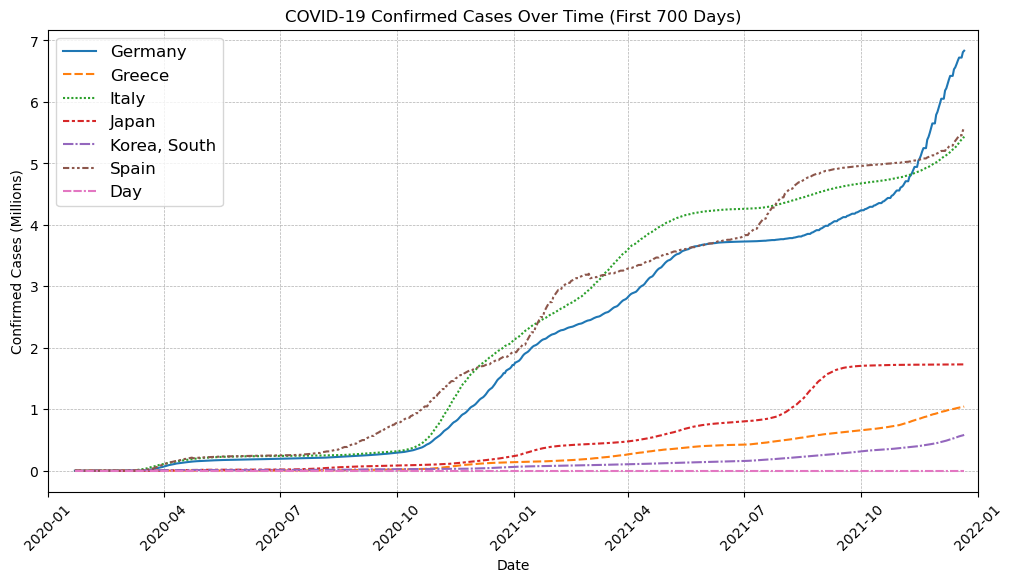

In [33]:
# Plotting the 700 days dataset
plt.figure(figsize=(12, 6))  # Adjusting the size of the plot
sns.lineplot(data=df_700/1e6) # Converting the confirmed cases to millions
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2022-01-01')) # Setting the axis limits
plt.xticks(rotation=45)  # Rotating date labels for better readability
plt.xlabel('Date')
plt.ylabel('Confirmed Cases (Millions)')
plt.title('COVID-19 Confirmed Cases Over Time (First 700 Days)')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend(prop={'size': 12})
plt.show()

Based on this plot, it appears that South Korea, Japan and Greece had a similar growth rate of COVID-19 confirmed cases during the first two years of the pandemic, while Germany, Italy and Spain appear to also have a similar, comparatively much higher growth rate. These observations could have many possible explanations, such as differences in public health policies and testing rates, population density and demographics, international and domestic travel and overall public compliance, as well as the quality of data reporting itself.

We continue by plotting the 800 days dataset.


/home/giatraskon/anaconda3/envs/MLiCB/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/giatraskon/anaconda3/envs/MLiCB/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


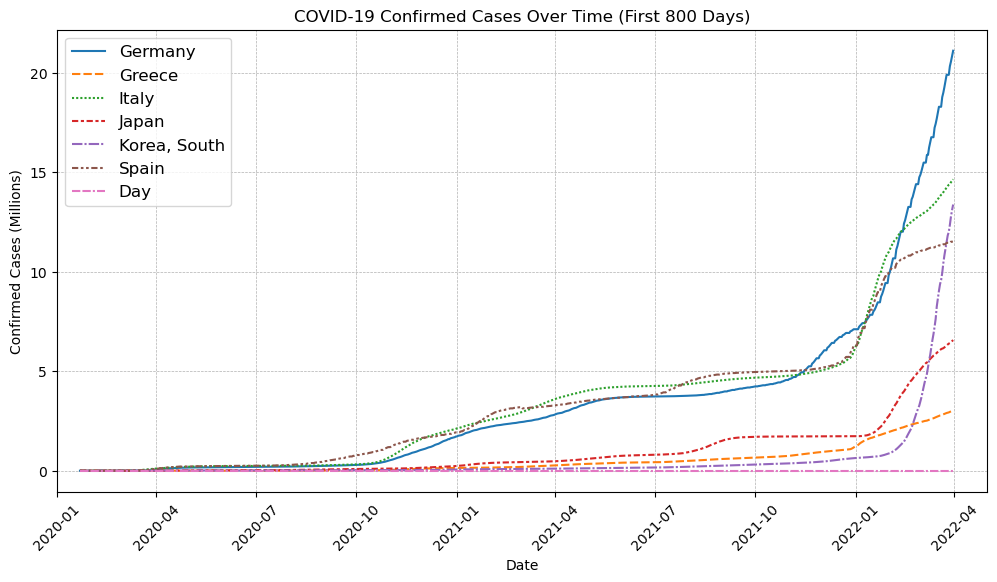

In [34]:
# Plotting the 800 days dataset
plt.figure(figsize=(12, 6))  # Adjusting the size of the plot
sns.lineplot(data=df_800/1e6) # Convering the confirmed cases to millions
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2022-05-01')) # Setting the axis limits
plt.xticks(rotation=45)  # Rotating date labels for better readability
plt.xlabel('Date')
plt.ylabel('Confirmed Cases (Millions)')
plt.title('COVID-19 Confirmed Cases Over Time (First 800 Days)')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend(prop={'size': 12})
plt.show()

The addition of the extra 100 days to the previous 700 showcases a range of minor to major spikes in the growth rate of the confirmed COVID-19 cases across all countries. This is expected, as the first quarter of 2022 had the most daily new confirmed COVID-19 cases per million people worldwide so far (as of April 2024). The differences between the countries' growth rates can be explained by similar factors as the ones discussed before.

Finally, we plot the original/complete cleaned dataset.

/home/giatraskon/anaconda3/envs/MLiCB/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/giatraskon/anaconda3/envs/MLiCB/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


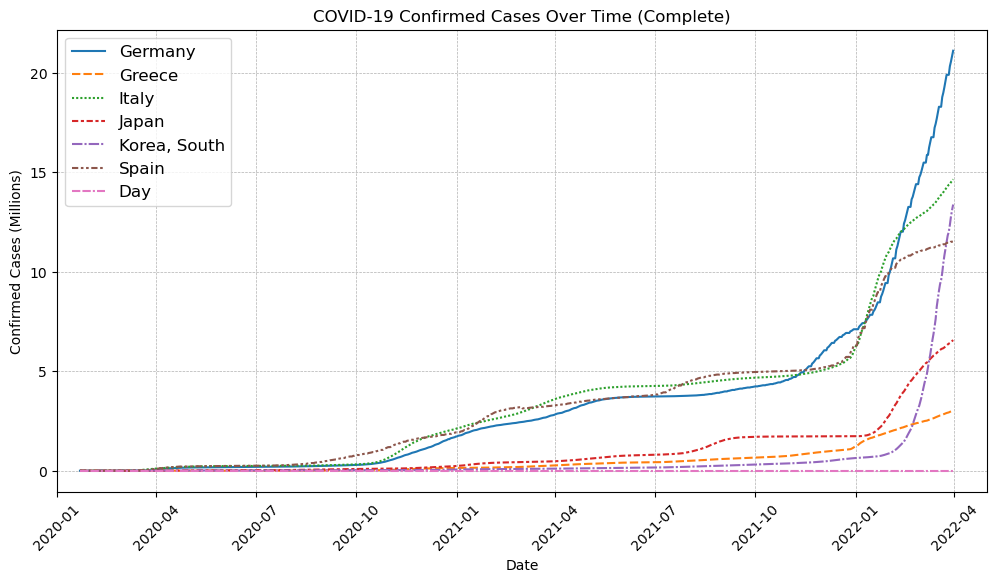

In [37]:
# Plotting the complete cleaned dataset
plt.figure(figsize=(12, 6))  # Adjusting the size of the plot
sns.lineplot(data=df_final/1e6) # Convering the confirmed cases to millions
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2022-05-01')) # Setting the axis limits
plt.xticks(rotation=45)  # Rotating date labels for better readability
plt.xlabel('Date')
plt.ylabel('Confirmed Cases (Millions)')
plt.title('COVID-19 Confirmed Cases Over Time (Complete)')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend(prop={'size': 12})
plt.show()

We observe that this plot is identical to the 800 Days plot. This is expected, because, as previously discussed, the original cleaned dataset only contained data for 800 days, making the complete and the 800 days datasets the same.